In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [2]:
def _load_comments(comments_file):
    data = pd.read_csv(comments_file, sep=',')
    X, y = np.array(data['comment_text']), np.array(data['is_toxic'])

    toxic_indices = np.argwhere(y == 1).flatten()

    return '\n'.join(X[toxic_indices])

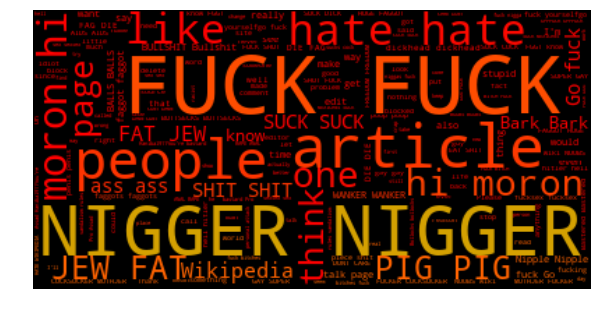

In [6]:
coloring = np.array(Image.open('../../data/maxresdefault.jpg'))
image_colors = ImageColorGenerator(coloring)

text = _load_comments('../../data/train_binary_labels.csv')
wordcloud = WordCloud(font_path=None,
                      relative_scaling = 1.0,
                      stopwords = set(stopwords.words('english'))
                      ).generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()